(chap-random-numbers)=
# Aufgabe 7: Zufallszahlen generieren

## Theorie

Im Block "*Datenqualität und Unsicherheit*" hattet ihr auch mit Zufallszahlen und Simulationen auseinandergesetzt. Programmiersprachen sind für eine solche Anwendung sehr gut geeignet, und deshalb werden wir in diesem Abschnitt eine Erweiterung zur Erstellung von Zufallszahlen kennenlernen. Diese Erweiterung lautet `random` und ist teil der ["Python Standard Library"](https://en.wikibooks.org/wiki/Python_Programming/Standard_Library), was bedeutet das wir dieses Erweiterung bereits installiert ist, und wir sie nicht installieren müssen um sie zu nutzen. 

In [143]:
import random

In [144]:
random.seed(2)

Innerhalb vom `random` gibt es zahlreiche Funktionen um Zufallszahlen zu generieren, je nach dem was unsere Anforderungen an die Zufallszahl ist. Zum Beispiel könnte eine Anforderung sein, dass die Zahl innerhalb von einem bestimmten Bereich liegt (z.B. "*generiere eine Zufallszahl zwischen 1 und 10*"). Oder aber, dass sie eine ganze Zahl sein muss. Weiter könnte die Anforderung sein, dass sie aus einer bestimmten Verteilung kommen sollte, zum Beispiel einer Normalverteilung. In diesem letzten Fall müssen wir den Mittlwert sowie die Standartabweichung unserer Verteilung angeben.

Um eine ganzzahlige Zufallszahl zwischen 0 und 10 zu generieren, können wir die Funktion `randrange()` nutzen:

In [130]:
random.randrange(0,10)

4

Wenn wir auf diese Weise mit `randrange()` immer wieder neue Zufallszahlen generieren und deren Häufigkeitsverteilung anschauen, sehen wir das diese "Uniform" verteilt sind. Das heisst es ist gleich wahrscheinlich eine 10 zu bekommen eine eine 0 oder eine 5.

In [131]:
from matplotlib import pyplot as plt 


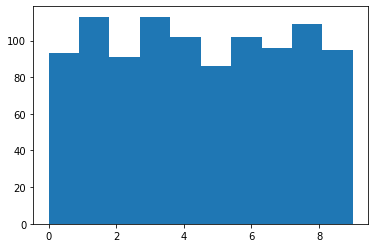

In [132]:
fig, ax = plt.subplots() 
a = [random.randrange(0,10) for x in range(0,1000)]

ax.hist(a) 

plt.show()

Die Funktion `randrange(0,10)` generiert nur ganzzahlige Zufallszahlen. Wenn wir aber eine Zufallszahl mit Nachkommastellen haben möchten, müssen wir die Funktion `uniform()` verwenden. 

Um Zufallszahlen aus einer "Normalverteilung" zu bekommen müssen wir die Funktion `normalvariate` nutzen. Hier müssen wir, wie Eingangs erwähnt, den Mittelwert und die Standartabweichung dieser Verteilung angeben. Tatsächlich können wir bei dieser Variante keine Minimum- und Maximumwerte festlegen. Theoretisch könnte der Generator jeden erdenklichen Zahlenwert rausspucken, am wahrscheinlichsten ist jedoch eine Zahl nahe am angegebenen Mittelwert.

In [133]:
random.normalvariate(5,2)

4.381752683740362

Wenn wir die obige Funktion 1000x laufen lassen und uns das Histogramm der generierten Zahlen anschauen, dann zeichnet sich folgendes Bild ab. 

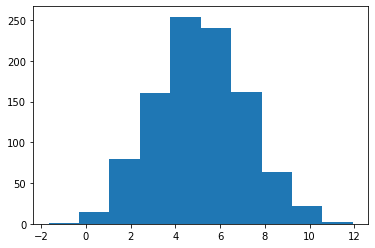

In [134]:
fig, ax = plt.subplots() 
a = [random.normalvariate(5,2) for x in range(0,1000)]

ax.hist(a) 

plt.show()

## Übungen

Nun wollen wir diesen Zufallszahlengenerator `random` nutzen um eine Funktion zu entwickeln, welche einen beliebigen Punkt (mit einer x-/y-Koordinate) zufällig in einem definierten Umkreis verschiebt. Unser Fernziel ist es, den simulierten Datensatz aus  "Datenqualität und Unsicherheit" zu rekonstruieren (siehe unten). Der erste Schritt dorthin ist es, einen gemeldeten Punkt (rot in {numref}`arcgiszecken`) in einem definierten Umkreis zu verschieben.

(arcgiszecken)=
```{figure} arcgiszecken.jpg
Ausschnitt der simulierten Zeckenstiche. Der rote Punkt stellt jeweils der gemeldete Zeckenstich dar, die blaue Punktwolke drum herum sind simulierte Punkte welche die Ungenauigkeit der Daten wiederspiegelt.
```



Das Ziel dieser Übung ist es also, dass wir eine Funktion entwickeln, die uns einen zufälligen Punkt in der Nähe eines Ursprungspunktes vorschlägt. Unser Vorgehen: Wir addieren jedem Koordinatenwert (`x`/`y`) des Ursprungspunktes einen Zufallswert, zum Beispiel zwischen -100 bis +100.


### Übung 7.1: Zufallszahlen aus Uniformverteilung

Bevor wir mit Koordinaten arbeiten wollt ihr euch zuerst mit dem Modul `random` vertraut machen. Importiere das Modul `random` und generiere eine Zufallszahl zwischen -100 und +100 aus einer uniformen Verteilung.

In [135]:
# Musterlösung

import random

random.uniform(-100,100)

-51.81772399951756

### Übung 7.2: Dummykoordinaten erstellen

Nun wollen wir uns den Koordinaten zuwenden. Erstelle als erstes zwei Dummykoordinaten `x_start` und `y_start` mit jeweils dem Wert `0`. Diese sollen als "Ursprungskoordinaten" dienen.


In [136]:
# Musterlösung

x_start = 0
y_start = 0

### Übung 7.3: Zufallswerte generieren

Generiere nun eine Zufallszahl, die aus einer Normalverteilung stammt und die *in etwa* zwischen -100 und +100 liegt. Weise diese Zahl der Variabel `x_offset` zu.
Generiere danach eine zweite Zufallszahl (auf die gleiche Art) und weise diese `y_offset` zu.


````{tip}
:class: dropdown
Überlege dir, welcher *Mittelwert* Sinn macht um Werte zwischen -100 und +100 zu bekommen. 

Überlege dir als nächstes, welche Standartabweichung sinnvoll wäre. Zur Erinnerung: Etwa 68% der Werte liegen inerhalb von +/- 1 Standartabweichung (SD), 95% innerhalb von +/- 2 SD, 99% innerhalb von 3 SD (siehe unten):


```{figure} normalverteilung.jpg
Normalverteilung und die Anteile innerhalb von 1 Standartabweichung (Mittelwert $\mu$ minus Standartabweichung $\sigma$), 2 Standartabweichungen ($\mu - 2\times\sigma)$ und 2 Standartabweichungen ($\mu - 3\times\sigma)$. Quelle: [cobocards](https://www.cobocards.com/)
```
````

In [137]:
# Musterlösung

# Normalverteilte Werte mit Mittelwert 0 und Standartabweichung 100  
# Achtung: bei dieser Standartabweichung sind ca 30% der Werte > 100!
x_offset = random.normalvariate(0,100)
y_offset = random.normalvariate(0,100)

x_offset
y_offset

9.274235969556129

### Übung 7.4: Zufallswerte addieren

Addiere nun die Zufallszahlen `x_offset` und `y_offset` **jeweils** zu den Dummykoordinaten `x_start` und `y_start` und weise diese neuen Koordinaten `x_neu` und `y_neu` zu. Die neuen Werte stellen die leicht verschobenen Ursprungskoordinaten dar. In meinem Fall sind diese um 42.5 bzw. 4.4 Meter nach Westen bzw. Süden verschoben worden.

In [138]:
# Musterlösung

x_neu = x_start+x_offset
y_neu = y_start+y_offset

In [139]:
x_neu

30.246170309600945

In [140]:
y_neu

9.274235969556129

### Übung 7.5: Arbeitsschritte in eine *Function* verwandeln

Nun haben wir das zufällige Verschieben eines Einzelpunktes am Beispiel einer Dummykoordinaten (`0`/`0`) durchgespielt. In der nächsten Aufgabe ({ref}`chap-offset-dataframe`) werden wir *alle* unsere Zeckenstichkoordinaten auf diese Weise zufällig verschieben um einen Simulierten Zeckenstichdatensatz ähnlich wie {numref}`arcgiszecken` zu erhalten. 

Dafür brauchen wir die eben erarbeiteten Einzelschritte als Funktion, um diese auf alle Zeckenstiche anwenden zu können. Erstelle eine Funktion namens `offset_coordinate` welche als Input eine `x` oder `y`-Achsenwert annimmt und eine leicht verschobene Wert zurück gibt. Integriere die Distanz der Verschiebung als optionalen Parameter mit einem Standartwert von 100. 

In [141]:
# Musterlösung

def offset_coordinate(old, distance = 100):
    new = old + random.normalvariate(0,distance)

    return(new)


offset_coordinate(x, 100)

2600026.960992598

### Übung 7.6: Output visualisieren

Nun ist es wichtig, dass wir unser Resultat visuell überprüfen. Im Beispiel unten wende ich die *Function* `offset_coordinate()` 1000x auf die Koordianten der alten Sternwarte an. Für diesen Schritt gebe ich euch den fertigen Code, da ihr die dafür benötigten Techniken noch nicht gelernt habt. Füge diesen Code in dein Script ein und führe ihn aus. Allenfalls musst du den Code leicht an deine Situation anpassen.

(-339.3112339631146, 313.4578571880634, -329.62891111590625, 351.0638838736822)

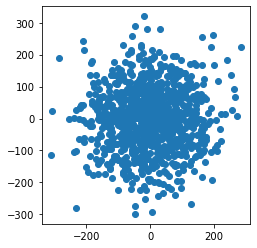

In [142]:
from matplotlib import pyplot as plt 
import pandas as pd

x_neu_list = [offset_coordinate(x_start, 100) for i in range(1,1000)]
y_neu_list = [offset_coordinate(y_start, 100) for i in range(1,1000)]

fig = plt.scatter(x_neu_list,y_neu_list)

plt.axis("scaled")